In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/content/power consumption.csv')
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
df.shape

(52416, 8)

In [4]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52416 non-null  float64
 1   Humidity               52416 non-null  float64
 2   Wind Speed             52416 non-null  float64
 3   general diffuse flows  52416 non-null  float64
 4   diffuse flows          52416 non-null  float64
 5   Zone 1                 52416 non-null  float64
 6   Zone 2                 52416 non-null  float64
 7   Zone 3                 52416 non-null  float64
dtypes: float64(8)
memory usage: 3.2 MB


In [6]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Zone 1,0
Zone 2,0
Zone 3,0


In [7]:
df.fillna(df.mean(), inplace=True)

In [8]:
columns_to_scale = [
    'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
    'diffuse flows', 'Zone 1', 'Zone 2  ', 'Zone 3  '
]


standard_scaler = StandardScaler()

df[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])

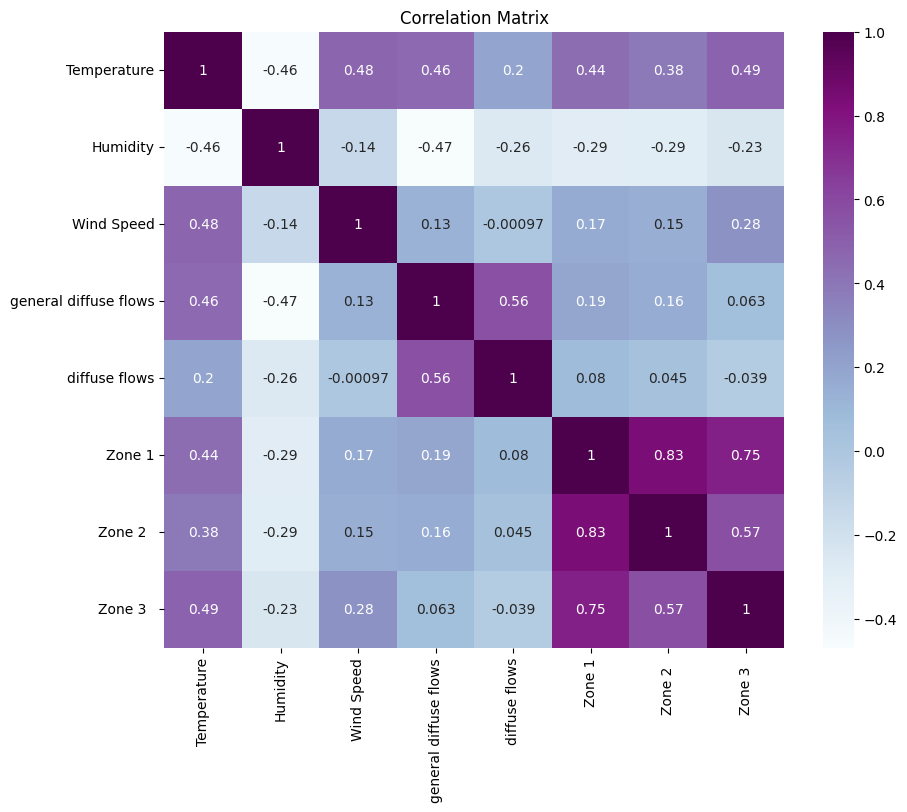

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

In [10]:
print(df.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1', 'Zone 2  ', 'Zone 3  '],
      dtype='object')


In [11]:
df['Total Power Consumption'] = df[['Zone 1', 'Zone 2  ', 'Zone 3  ']].sum(axis=1)

In [12]:
x = df.drop(['Zone 1', 'Zone 2  ', 'Zone 3  ', 'Total Power Consumption'], axis=1)
y = df['Total Power Consumption']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R² Score:", r2_rf)

Random Forest R² Score: 0.6316646025214125


In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_rf})
print(results.head())

     Actual  Predicted
0 -0.258662  -0.848031
1  1.503639   2.266602
2 -0.876989  -0.804342
3  3.014654  -1.085666
4 -4.232432  -0.903696


In [23]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_rf

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1.1224723364382079
Mean Squared Error (MSE): 2.6739942208077747
Root Mean Squared Error (RMSE): 1.6352352188011896
R² Score: 0.6316646025214125


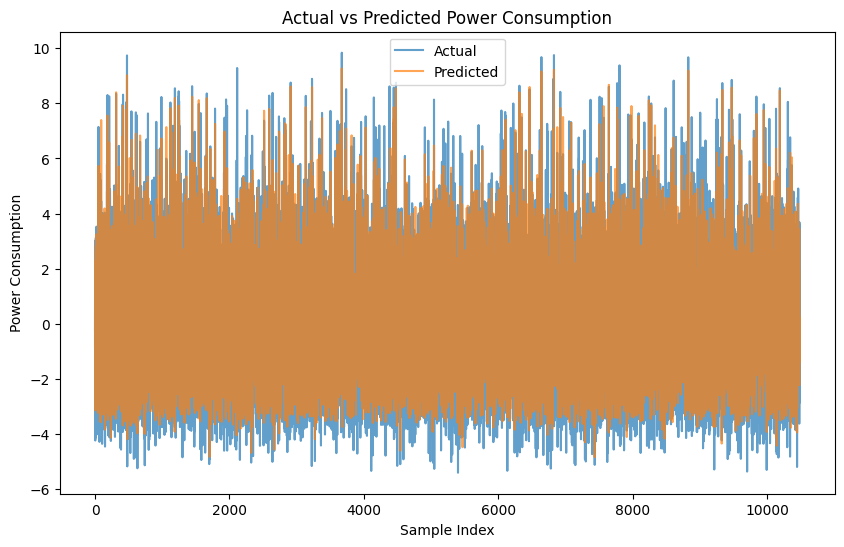

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred_rf, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Power Consumption')
plt.xlabel('Sample Index')
plt.ylabel('Power Consumption')
plt.show()

In [25]:
print(x_test.shape)
print(y_test.shape)

(10484, 5)
(10484,)


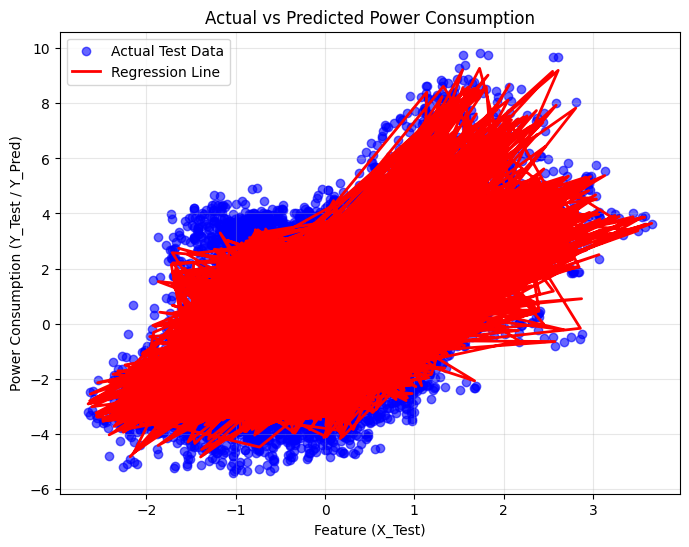

In [26]:
x_test = np.array(x_test)  # Ensure x_test is a NumPy array
x_test_feature = x_test[:, 0]  # Use the first feature for plotting (if multivariate)

# Scatter plot for actual data
plt.figure(figsize=(8, 6))
plt.scatter(x_test_feature, y_test, color='blue', alpha=0.6, label='Actual Test Data')

# Regression line for predicted data
plt.plot(x_test_feature, y_pred_rf, color='red', linewidth=2, label='Regression Line')

# Adding titles and labels
plt.title('Actual vs Predicted Power Consumption')
plt.xlabel('Feature (X_Test)')
plt.ylabel('Power Consumption (Y_Test / Y_Pred)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [27]:
import joblib
# Save the model to a file
joblib.dump(rf, 'power_consumption_prediction.pkl')

['power_consumption_prediction.pkl']

In [28]:
model = joblib.load('power_consumption_prediction.pkl')

In [29]:
 new_data = {
    'Temperature': [25.0],
    'Humidity': [60.0],
    'Wind Speed': [10.0],
    'general diffuse flows': [200.0],
    'diffuse flows': [150.0],     'Zone 1':[0.8], 'Zone 2  ':[0.9], 'Zone 3  ':[1.0]

}

In [30]:
user_input = pd.DataFrame(new_data)
user_input

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,25.0,60.0,10.0,200.0,150.0,0.8,0.9,1.0


In [31]:
# Step 1: Get user input for the 5 features
print("Please enter the following details:")

temperature = float(input("Enter temperature: "))
humidity = float(input("Enter humidity: "))
wind_speed = float(input("Enter wind speed: "))
general_flows = float(input("Enter general flows: "))
diffuse_flows = float(input("Enter diffuse flows: "))

# Step 2: Create a DataFrame with the user input and proper feature names
user_input = pd.DataFrame([[temperature, humidity, wind_speed, general_flows, diffuse_flows]])

# Step 3: Scale the user input using the scaler (which expects DataFrame)
user_input_scaled = scaler.transform(user_input)

# Step 4: Make the prediction using the trained model
predicted_power_consumption = model.predict(user_input_scaled)

# Step 5: Output the predicted power consumption
print(f'Predicted Power Consumption: {predicted_power_consumption[0]}')


Please enter the following details:
Enter temperature: 25
Enter humidity: 50
Enter wind speed: 8
Enter general flows: 200
Enter diffuse flows: 100
Predicted Power Consumption: 1.5860020906540637
